In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv('monthly-sunspots.csv')

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
sunspots_normalized = scaler.fit_transform(df['Sunspots'].values.reshape(-1, 1))

def create_sequences(data, sequence_length):
    sequences = []
    target = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        target.append(data[i + sequence_length])
    return np.array(sequences), np.array(target)

sequence_length = 12
X, y = create_sequences(sunspots_normalized, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2246, 12, 1), (562, 12, 1), (2246, 1), (562, 1))

# Desarrollo de la RNN

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(32),                                           
    Dense(1, activation='linear') 
])                     

model.compile(loss='mse', optimizer='adam', metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 12, 64)            16896     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


# Entrenar la RNN

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
57/57 [==============================] - 6s 35ms/step - loss: 0.0153 - accuracy: 0.0223 - val_loss: 0.0063 - val_accuracy: 0.0333
Epoch 2/50
57/57 [==============================] - 1s 15ms/step - loss: 0.0064 - accuracy: 0.0223 - val_loss: 0.0060 - val_accuracy: 0.0333
Epoch 3/50
57/57 [==============================] - 1s 17ms/step - loss: 0.0060 - accuracy: 0.0223 - val_loss: 0.0068 - val_accuracy: 0.0333
Epoch 4/50
57/57 [==============================] - 1s 15ms/step - loss: 0.0056 - accuracy: 0.0223 - val_loss: 0.0056 - val_accuracy: 0.0333
Epoch 5/50
57/57 [==============================] - 1s 13ms/step - loss: 0.0051 - accuracy: 0.0223 - val_loss: 0.0051 - val_accuracy: 0.0333
Epoch 6/50
57/57 [==============================] - 1s 13ms/step - loss: 0.0051 - accuracy: 0.0223 - val_loss: 0.0055 - val_accuracy: 0.0333
Epoch 7/50
57/57 [==============================] - 1s 13ms/step - loss: 0.0050 - accuracy: 0.0223 - val_loss: 0.0051 - val_accuracy: 0.0333
Epoch 8/50
57

# Probar la RNN

In [1]:
loss_rnn = model.evaluate(X_test, y_test)
print('MSE:', loss_rnn)

NameError: name 'model' is not defined

# Precicciones de la RNN

In [19]:
predictions = model.predict(X_test)
predictions_original_scale = scaler.inverse_transform(predictions)

18/18 [==============================] - 1s 4ms/step


# Plotting Results

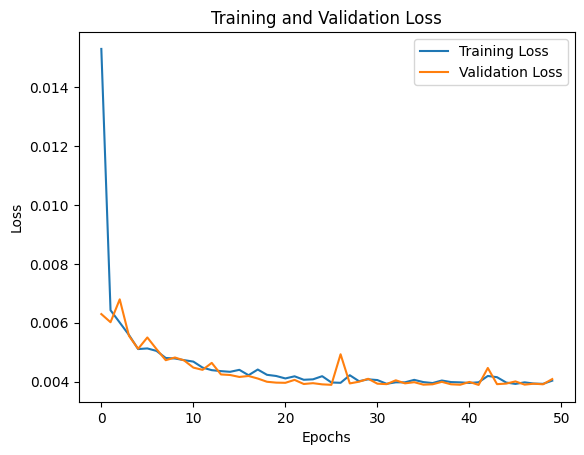

In [28]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

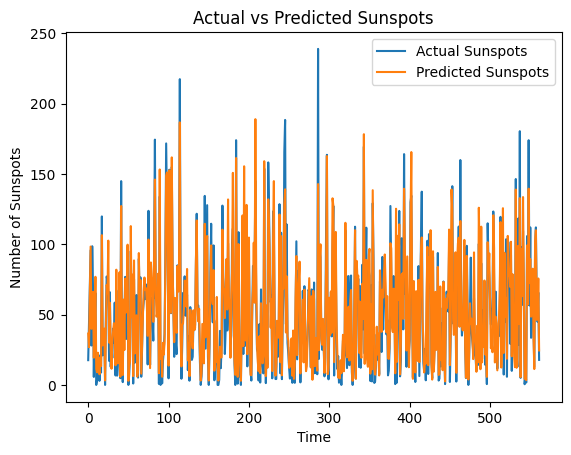

In [29]:
y_test_original_scale = scaler.inverse_transform(y_test)

plt.plot(y_test_original_scale, label='Actual Sunspots')
plt.plot(predictions_original_scale, label='Predicted Sunspots')
plt.xlabel('Time')
plt.ylabel('Number of Sunspots')
plt.title('Actual vs Predicted Sunspots')
plt.legend()
plt.show()

1/1 [==============================] - 1s 889ms/step


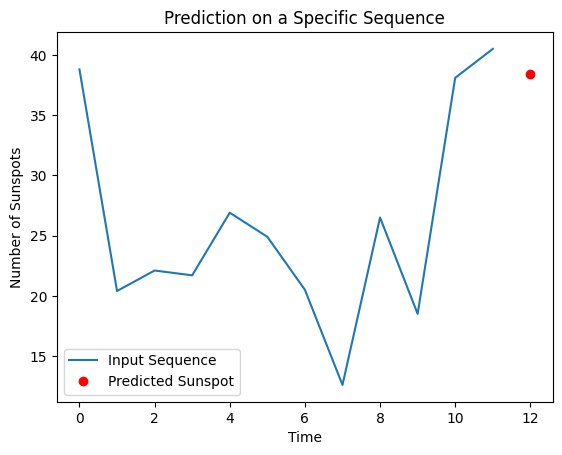

In [30]:
sequence_number = 0
sequence_prediction = model.predict(X_test[sequence_number].reshape(1, 12, 1))
sequence_prediction_original_scale = scaler.inverse_transform(sequence_prediction)
input_sequence_original_scale = scaler.inverse_transform(X_test[sequence_number])

plt.plot(input_sequence_original_scale, label='Input Sequence')
plt.plot([12], sequence_prediction_original_scale, 'ro', label='Predicted Sunspot')
plt.xlabel('Time')
plt.ylabel('Number of Sunspots')
plt.title('Prediction on a Specific Sequence')
plt.legend()
plt.show()